In [26]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from census import Census
import numpy as np

In [27]:
#Import crime data
filepath = r'C:\Users\Jake\Downloads\UCR76_17.csv'
crime_df = pd.read_csv(filepath)
crime_df.head()

,ORI,Name,YEAR,MRD,CLR,State,County,Agency
0,AK00101,ANCHORAGE,1965,7,6,Alaska,"Anchorage, AK",Anchorage
1,AK00101,ANCHORAGE,1966,18,16,Alaska,"Anchorage, AK",Anchorage
2,AK00101,ANCHORAGE,1967,1,1,Alaska,"Anchorage, AK",Anchorage
3,AK00101,ANCHORAGE,1968,7,5,Alaska,"Anchorage, AK",Anchorage
4,AK00101,ANCHORAGE,1969,7,4,Alaska,"Anchorage, AK",Anchorage


In [29]:
crime_df['County'].to_csv('county_crime.csv')

C:\Users\Jake\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [ ]:
income_df 

In [23]:
#Import income data (2017)
filepath1 = r'C:\Users\Jake\Downloads\kaggle_income2.xlsx'
income_df = pd.read_excel(filepath1)
#view income data
income_df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [30]:
income_df['County'].to_csv('CountyIncome.csv')

C:\Users\Jake\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [14]:
#filter crime data for year 2017 to match the income data
crime_df = crime_df.loc[crime_df['YEAR']==2017]

In [5]:
#Split of the state abbreviation from each of the counties on the crime dataframe
crime_df['County1'] = crime_df['County'].str.split(',').str[0]

In [6]:
# Add county to the end of each county entry in the crime dataframe to match the format of the income dataframe
crime_df['County'] = crime_df['County1'] + " " + 'County'

In [16]:
#Pivot on County and sum the murders to get the total amount of murders for the whole county
crime_df2 = crime_df.groupby('County').sum()['MRD']

In [8]:
#merge the crime and income dataframes on the shared county column
combined_df = pd.merge(crime_df, income_df, on = 'County')
#display combined dataframe
combined_df.head()

,ORI,Name,YEAR,MRD,CLR,State,County,Agency,County1,id,...,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,AK00103,JUNEAU,2017,1,3,Alaska,Juneau County,Juneau,Juneau,55011637,...,53968,608,2066088,0,43.682640,-90.263317,48649,36088,35247,52.764185
1,AL00100,JEFFERSON,2017,5,2,Alabama,Jefferson County,Jefferson County,Jefferson,1011170,...,35080,205,53950336,833954,33.285635,-86.874488,93682,300000,55763,359.444828
2,AL00100,JEFFERSON,2017,5,2,Alabama,Jefferson County,Jefferson County,Jefferson,1011270,...,35064,205,6869817,0,33.455197,-86.922633,48074,39817,37964,1376.651180
3,AL00100,JEFFERSON,2017,5,2,Alabama,Jefferson County,Jefferson County,Jefferson,101920,...,35120,205,27893577,150331,33.691576,-86.503766,242857,300000,25317,1.133107
4,AL00100,JEFFERSON,2017,5,2,Alabama,Jefferson County,Jefferson County,Jefferson,101950,...,35022,205,104798633,439841,33.370789,-86.971596,41239,29150,38565,7625.528576


In [27]:
combined_df.columns

Index(['index', 'ORI', 'Name', 'YEAR', 'MRD', 'CLR', 'State', 'County',
       'Agency', 'County1', 'County2', 'id', 'State_Code', 'State_Name',
       'State_ab', 'City', 'Place', 'Type', 'Primary', 'Zip_Code', 'Area_Code',
       'ALand', 'AWater', 'Lat', 'Lon', 'Mean', 'Median', 'Stdev', 'sum_w'],
      dtype='object')

In [11]:
#remove unnecessary columns
clean_df = combined_df[['State', 'County', 'MRD', 'CLR', 'Zip_Code', 'Lat', 'Lon', 'Mean', 'Median']]

In [12]:
clean_df

,State,County,MRD,CLR,Zip_Code,Lat,Lon,Mean,Median
0,Alaska,Juneau County,1,3,53968,43.682640,-90.263317,48649,36088
1,Alabama,Jefferson County,5,2,35080,33.285635,-86.874488,93682,300000
2,Alabama,Jefferson County,5,2,35064,33.455197,-86.922633,48074,39817
3,Alabama,Jefferson County,5,2,35120,33.691576,-86.503766,242857,300000
4,Alabama,Jefferson County,5,2,35022,33.370789,-86.971596,41239,29150
5,Alabama,Jefferson County,5,2,80021,39.882190,-105.064426,85644,74974
6,Alabama,Jefferson County,5,2,80005,39.833728,-105.150306,83127,69340
7,Alabama,Jefferson County,5,2,80127,39.619427,-105.135692,94774,87020
8,Alabama,Jefferson County,5,2,80454,39.668928,-105.243191,69800,300000
9,Alabama,Jefferson County,5,2,80226,39.698942,-105.117551,70376,56870


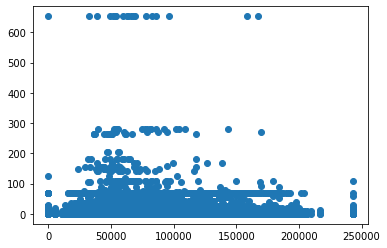

In [33]:
plt.scatter(combined_df['Mean'], combined_df['MRD'])